In [1]:
import tensorflow_hub as hub
import tensorflow_text as text

In [2]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [3]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)
text_test = ['nice movie indeed','I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_type_ids', 'input_word_ids', 'input_mask'])

In [4]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [5]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [6]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['default', 'sequence_output', 'encoder_outputs', 'pooled_output'])

In [7]:
bert_results['sequence_output']#128 padding

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292041,  0.08567816,  0.14476837, ..., -0.0967708 ,
          0.08722115,  0.07711103],
        [ 0.17839377, -0.19006082,  0.50349444, ..., -0.05869827,
          0.32717147, -0.15578502],
        [ 0.18701456, -0.4338877 , -0.48875162, ..., -0.1550281 ,
          0.00145131, -0.24470958],
        ...,
        [ 0.12083077,  0.12884237,  0.46453524, ...,  0.07375517,
          0.17441934,  0.16522089],
        [ 0.07967839, -0.01190699,  0.5022542 , ...,  0.13777757,
          0.21002182,  0.0062461 ],
        [-0.07212706, -0.2830349 ,  0.5903332 , ...,  0.47551912,
          0.1666846 , -0.08920319]],

       [[-0.07900587,  0.36335132, -0.2110159 , ..., -0.17183743,
          0.16299748,  0.6724267 ],
        [ 0.27883568,  0.43716288, -0.35764778, ..., -0.04463685,
          0.3831519 ,  0.588798  ],
        [ 1.2037668 ,  1.0727028 ,  0.48408768, ...,  0.24921045,
          0.40730873,  0.4048177 ],
        ...,

In [8]:
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.791774  , -0.21411902,  0.49769545, ...,  0.24465242,
        -0.47334465,  0.8175868 ],
       [-0.91712296, -0.47935185, -0.78656995, ..., -0.61751765,
        -0.71026856,  0.92184293]], dtype=float32)>

In [9]:
bert_results['encoder_outputs']

[<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
 array([[[ 0.12901425,  0.0064474 , -0.03614967, ...,  0.04999621,
           0.06149199, -0.02657534],
         [ 1.1753383 ,  1.2140784 ,  1.1569982 , ...,  0.11634377,
          -0.3585536 , -0.40490198],
         [ 0.03859022,  0.53869987, -0.21089768, ...,  0.21858197,
           0.7260166 , -1.1158605 ],
         ...,
         [-0.07587015, -0.25421888,  0.7075511 , ...,  0.50542   ,
          -0.18878672,  0.1502834 ],
         [-0.16066599, -0.28089687,  0.57597077, ...,  0.5275854 ,
          -0.11141385,  0.02887553],
         [-0.04428148, -0.20279586,  0.59093565, ...,  0.81338364,
          -0.3907581 , -0.02601735]],
 
        [[ 0.18903589,  0.02752547, -0.06513736, ..., -0.00620209,
           0.15053898,  0.03165447],
         [ 0.591615  ,  0.758914  , -0.07240664, ...,  0.6190398 ,
           0.829289  ,  0.16161953],
         [ 1.4460828 ,  0.44602656,  0.40990266, ...,  0.48255897,
           0.6269114 ,  0.13

# SMS Classification

In [10]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [11]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding = "ISO-8859-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df = df.loc[:, df.columns.isin(["v1", "v2"])]

In [13]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [14]:
df_spam = df[df['v1']=='spam']
df_spam.shape

(747, 2)

In [15]:
df_ham = df[df['v1']=='ham']
df_ham.shape

(4825, 2)

In [16]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Encode the text data as numeric values
# vectorizer = TfidfVectorizer()
# X_train_encoded = vectorizer.fit_transform(df["v2"])

# # Apply SMOTE-Tomek to the training data
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train_encoded, df["v1"])

# # Convert the numeric data back to text data
# X_resampled = vectorizer.inverse_transform(X_resampled)

In [17]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [18]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 2)

In [19]:
df_balanced['spam']=df_balanced['v1'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,v1,v2,spam
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40...",1
4045,spam,Win a å£1000 cash prize or a prize worth å£5000,1
3160,ham,Mystery solved! Just opened my email and he's ...,0
4731,ham,Wat time r Ì_ going to xin's hostel?,0
4277,ham,I've reached home finally...,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['v2'],df_balanced['spam'], stratify=df_balanced['spam'])

In [21]:
X_train.head(4)

1733    Hi, this is Mandy Sullivan calling from HOTMIX...
4472                             S but not able to sleep.
3058    Dear all, as we know  &lt;#&gt; th is the  &lt...
3948    HMM yeah if your not too grooved out! And im l...
Name: v2, dtype: object

## Now lets import BERT model and get embeding vectors for few sample statements

In [22]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [23]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435172 , -0.5132727 , -0.88845736, ..., -0.74748874,
        -0.7531474 ,  0.9196451 ],
       [-0.8720836 , -0.50543964, -0.9444668 , ..., -0.85847515,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

In [24]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [26]:
cosine_similarity([e[0]],[e[3]])

array([[0.84703845]], dtype=float32)

In [27]:
cosine_similarity([e[3]],[e[4]]) # Jeff bezos and Elon musk are more similar then Jeff bezos and banana as indicated above

array([[0.9872034]], dtype=float32)

In [28]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [30]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [31]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 284s 8s/step - loss: 0.6289 - accuracy: 0.6545 - precision: 0.6484 - recall: 0.6750
Epoch 2/10
35/35 [==============================] - 273s 8s/step - loss: 0.5237 - accuracy: 0.7848 - precision: 0.7874 - recall: 0.7804
Epoch 3/10
35/35 [==============================] - 271s 8s/step - loss: 0.4567 - accuracy: 0.8214 - precision: 0.8285 - recall: 0.8107
Epoch 4/10
35/35 [==============================] - 273s 8s/step - loss: 0.4087 - accuracy: 0.8741 - precision: 0.8497 - recall: 0.9089
Epoch 5/10
35/35 [==============================] - 274s 8s/step - loss: 0.3797 - accuracy: 0.8661 - precision: 0.8522 - recall: 0.8857
Epoch 6/10
35/35 [==============================] - 273s 8s/step - loss: 0.3540 - accuracy: 0.8786 - precision: 0.8643 - recall: 0.8982
Epoch 7/10
35/35 [==============================] - 274s 8s/step - loss: 0.3391 - accuracy: 0.8875 - precision: 0.8754 - recall: 0.9036
Epoch 8/10
35/35 [==============================

In [32]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 92s 8s/step - loss: 0.2816 - accuracy: 0.9198 - precision: 0.9290 - recall: 0.9091


[0.28160524368286133,
 0.9197860956192017,
 0.9289617538452148,
 0.9090909361839294]

In [33]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 92s 8s/step


In [34]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[174,  13],
       [ 17, 170]])

Text(50.722222222222214, 0.5, 'Truth')

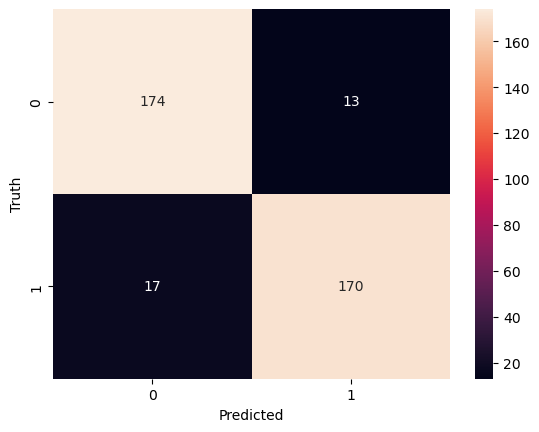

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       187
           1       0.93      0.91      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [38]:
#Inference
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 2s 2s/step


array([[0.7206294 ],
       [0.79341096],
       [0.71943074],
       [0.17891462],
       [0.08999934]], dtype=float32)